In [47]:
%matplotlib inline

import pdb
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from scipy.io import loadmat

## Decision tree

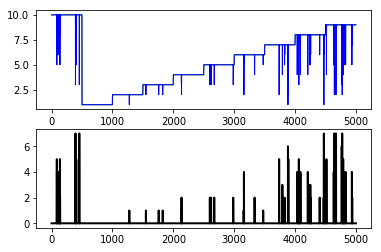

MSE for decision tree: 0.17 
 


In [48]:
# load Training Data Andrew Ng Machine Learning MOOC
data = loadmat('ex3data1.mat')
X = data['X']
y = data['y']

n = X.shape[0]
num_labels = np.unique(y).size

# seed random number generator
np.random.seed(2000)

# classification tree
clf = tree.DecisionTreeClassifier(min_samples_split=3)
clf = clf.fit(X, y)

# tree_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True) 
# graph = graphviz.Source(tree_data)
# graph

pred = clf.predict(X).reshape((-1,1))

# plot results
plt.subplot(211)
plt.plot(y,'g', linewidth=1)
plt.plot(pred,'b', linewidth=1)
plt.subplot(212)
plt.plot(y - pred, 'k', linewidth=2);
plt.show()

# calculate mean square error
mse = (1 / len(y)) * np.sum((y - pred)**2)
print('MSE for decision tree: %.2f \n ' % mse)

## Bagged tree

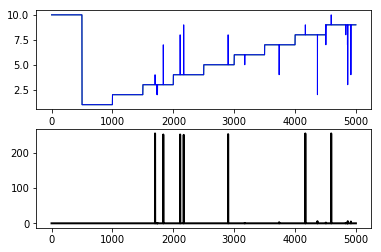

MSE for decision tree: 0.04 
 


In [51]:
# load Training Data Andrew Ng Machine Learning MOOC
data = loadmat('ex3data1.mat')
X = data['X']
y = data['y']

n = X.shape[0]
num_labels = np.unique(y).size

# seed random number generator
np.random.seed(2000)

# classification tree
d_tree = tree.DecisionTreeClassifier(min_samples_split=3)
clf = BaggingClassifier(d_tree)
clf = clf.fit(X, y.flatten())
pred = clf.predict(X).reshape((-1,1))

# plot results
plt.subplot(211)
plt.plot(y,'g', linewidth=1)
plt.plot(pred,'b', linewidth=1)
plt.subplot(212)
plt.plot(y - pred, 'k', linewidth=2);
plt.show()

# calculate mean square error
mse = (1 / len(y)) * np.sum((y - pred)**2)
print('MSE for bagging tree: %.2f \n ' % mse)